In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])
num_input = 2
num_hidden = 5
num_output = 1

Initialise weights and bias for input to hidden randomly

In [16]:
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))
print(Wxh)
print(bh)

[[ 0.10590946  0.28363011 -0.97349331 -0.57836786 -0.91165925]
 [-0.19969454  0.02673959 -0.28919374 -0.67698242 -1.10902429]]
[[0. 0. 0. 0. 0.]]


Now initialise weights for hidden to output randomly

In [17]:
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))
print(Why)
print(by)

[[ 1.77130631]
 [-0.81253004]
 [ 0.75295773]
 [ 1.57031008]
 [ 0.33932977]]
[[0.]]


In [18]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    
    return z1,a1,z2,y_hat


def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1) 

    return dJ_dWxh, dJ_dWhy

def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    
    return J



In [19]:
alpha = 0.01
num_iterations = 5000

In [20]:
cost = []
for i in range(num_iterations):
    
    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    
    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
        
    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
    
    #compute cost
    c = cost_function(y, y_hat)
    
    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

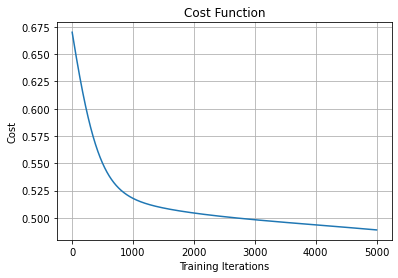

In [21]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')